In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_theme() # Apply the default theme

import math
import scipy.stats as st
import statsmodels.api as sm

# P-value Definition


<br>
<div style="background-color:blue;color:white;padding:10px 10px 10px 10px">
<b>P-value</b> is used in the <u>null-hypothesis significance test setting</u>, it's the probability of obtaining test results at least as extreme as the result actually observed from an experiment, under the assumption that the null hypothesis ($H_0$) is true.  
</div>

Let's set aside how to interprete **p-value** for hypothesis test. We will examine what's included in a **p-value** first. By the above definition, **p-value** consists of 3 parts:

- the probability of observing the event of interest;
- the probability of observing the other event that is equally likely;
- the probabilities of other events that are rarer than them.

[statquest: p-values clearly explained](https://youtu.be/5Z9OIYA8He8)



## P-value with Discrete Data

### Fair Coin Example 1

We will use a fair coin example to illustrate what is p-value for an observed result. 

Given we believe a coin is fair, i.e. the probability of getting heads is $p=0.5$. We can use random variable $X$ to model the number of heads out of $2$ tosses of this coin, which shall follow the **binomial probability distribution**: $X\sim \text{Bin}(n=2, p=0.5)$. 

Let's find out the <u>p-value for getting 2 Heads</u> after 2 tosses of this coin:

- First, the number of all possible outcomes from tossing a coin 2 times is $2^2=4$, which includes:

$$HH, HT, TH, TT$$

- Then, the number of all possible outcome(s) that will have 2 heads is ${2 \choose 2} = 1$, which includes:

$$HH$$

- Therefore, the <u>probability getting 2 Heads</u> is: 

$$\frac{\text{number of outcomes with 2H}}{\text{Total number of outcomes}}=\frac{1}{4}=0.25$$

- Or, we can use **binomial pmf formula** to calculate the probability since $X\sim Bin(n=2,p=0.5)$ :

$$\begin{split}
P(X=x) &= {n\choose x} p ^x (1-p)^{n-x}\\
\text{therefore}\\
P(X=2) &= {2\choose 2} 0.5 ^2 (1-0.5)^0= 0.25
\end{split}$$

- Now, let's compute the <u>p-value for getting 2 Heads</u>, which shall include:
    - The probability of getting 2 heads, $P(X=2)$, equals $0.25$;
    - The probability of getting 2 tails is equivalent to probability of getting 0 heads: $P(X=0)$, because the binomial distribution is symmetric with $p=0.5$; $P(X=0)$ equals $0.25$
    - $P(X < 0)$ and $P(X > 2)$ both equal $0$, because there is no more possible outcome rarer than getting 2 heads or 2 tails (0 heads)
    - The total of the above probabilities is the p-value, which equals $0.25+0.25+0 = 0.5$


### Symmetric Calculation with Equal Probability

Note that with $p=0.5$, the binomial distribution will be symmetrical no matter how small $n$ is:

$$P(X=x) = P(X=n-x) $$

For example:
- with $n=2$ tosses, the probability of getting $2$ heads is the same as getting $2$ tails, equivalent to getting $0$ heads. 
- with $n=4$ tosses, the probability of getting $1$ heads is the same as getting $1$ tails, equivalent to getting $3$ heads.

Therefore, we can simplify the calculation as follows:

$$\boxed{\text{p-value}= \begin{cases}
                 2\cdot P(X\leq x)\text{, if x}<np\\
                 2\cdot P(X\geq x)\text{, if x}>np\\
                 2\cdot P(X\geq x) - P(X=x)\text{, if x=np}
                 \end{cases}}$$
                 
where $np$ is the **mean** of the **binomial distribution**.

### Python implementation

Let's use Python to compute the p-value and visualize the probability distribution of the above example. Note that Python `scipy` library provides `cdf` function to compute cumulative probability of $P(X\leq x)$.

Be encouraged to experiment with different $n$ and $x$ in the following code to understand the concept.

Observed result: 2 heads out of 2 tosses
Probability of the observed result: 0.250
P-value, the probability of another result at least as extreme as the observed result: 0.500


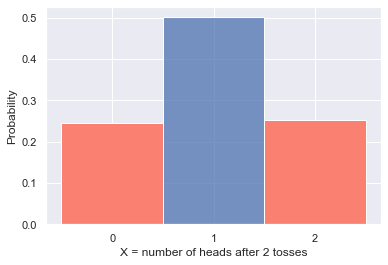

0.5

In [213]:
# define a function to simulate the binomial distribution and compute p-value
def symmetric_binom(n,p,x=0):
    
    binom = st.binom(n,p)
    
    print(f'Observed result: {x} heads out of {n} tosses')
    
    # the probability of getting x heads
    print(f'Probability of the observed result: {binom.pmf(x):.3f}')

    # compute the p-value
    if x == n*p:
        # if x == np, i.e. x and n-x are the same at the center of a symmetric distribution
        # exclude either P(X=x) or P(X=n-x), which are duplicates to each other
        # because cdf function is inclusive
        pv = binom.cdf(min(x, n-x))*2 - binom.pmf(x)
    else:
        pv = binom.cdf(min(x, n-x))*2
    print(f'P-value, the probability of another result at least as extreme as the observed result: {pv:.3f}')

    # plot the histogram
    rvs = binom.rvs(size=10000)
    bars = sns.histplot(rvs,discrete=True, stat='probability').patches
    plt.xticks(range(n+1), range(n+1))
    plt.xlabel(f'X = number of heads after {n} tosses')
    
    # show the area of p-value
    for i in range(len(bars)):
        # bar x pos is in the middle point of bin (binwidth is 1 in this case), 
        # therefore, add 0.5 to the x pos
        if bars[i].get_x()+.5 <=min(x, n-x) or bars[i].get_x()+.5 >=max(x, n-x):
            bars[i].set_facecolor('salmon')
    plt.show()
    
    # return p-value
    return pv
    


# display the simulation of the example
n, p=2, .5
x=2
symmetric_binom(n,p,x)

### The P-value that Equals One

Let's examine the following example. What is the p-value for getting 2 heads out of 4 tosses of a coin if it's fair?

First, what's the probability of getting 2 heads out of 4 tosses? 

- it's $\frac{\text{number of outcomes that has 2 heads}}{\text{total number of outcomes}}$, which can be calculated as: $\frac{{4\choose 2}}{2^{4}}=0.375$

And then, the p-value for the above result includes:

- the probability of getting 2 heads, $P(X=2)$;
- the probability of getting 2 tails, which is the same as the probability of getting $4-2=2$ heads, i.e. $P(X=2)$; therefore, this probability is a duplicate that shall be excluded from p-value calculation;
- the probability of rarer events: $P(X<2)$ or $P(X>2)$.

Observed result: 2 heads out of 4 tosses
Probability of the observed result: 0.375
P-value, the probability of another result at least as extreme as the observed result: 1.000


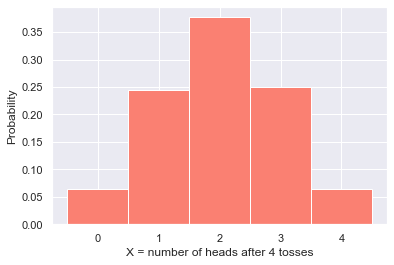

0.9999999999999999

In [214]:
n, p=4, .5
x=2
symmetric_binom(n,p,x)

As shown in the Python implementaion, the p-value equals $1$. It's because $2$ heads is expected out of $4$ tosses given $p =0.5$, which is the mean of the **symmetric binomial probability distribution**. The probability of observing another value at least or more extreme than the mean is $100\%$, that means, it's "absolutely likely" to observe such result given the coin is fair.

In contrast, if a test result is "absolutely unlikely" to happen, for example, getting 5 heads out of 4 tosses, the p-value will be $0$.

Observed result: 5 heads out of 4 tosses
Probability of the observed result: 0.000
P-value, the probability of another result at least as extreme as the observed result: 0.000


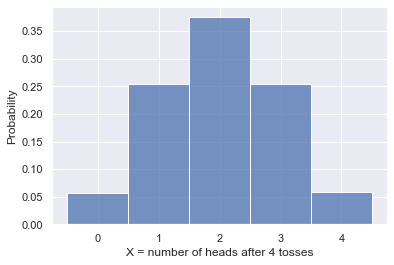

0.0

In [202]:
n, p=4, .5
x=5
symmetric_binom(n,p,x)

# P-value Interpretation

We have covered what a p-value includes. However, what does it mean for hypothesis test? How do we interprete it?

As mentioned above, **p-value** is the probability of obtaining another test result at least as extreme as the result actually observed from an experiment given the null hypothesis ($H_0$) is true. 

Let's drill down on what the definition implies:

- Firstly, we will have <u>the probability distribution of all possible test results under the null hypothesis</u>; Since a test result is the summary statistic of the results of $n$ random samples, for example, the sum of heads after $n$ tosses of a coin, the probability distribution of test results are also called **"sampling distribution of sample statistics"**, the test result is also called the **sample statistic**. 

- And then p-value is computed for the observed test result on this distribution.

- A very small **p-value** means that such an extreme observed result would be very unlikely under the **null hypothesis**

In hypothesis test, we use $\alpha$ as a threhold for significance, which is the **Type I error** probability we can accept. If p-value < $\alpha$, it means the the observed result falls outside of the range of test results that would happen $(1-\alpha)\%$ of the time given $H_0$ is true. In other words, it's very rare to obtain such result if $H_0$ is true, which probability is samller than $\alpha$. We can conclude that we have sufficient evidence to reject $H_0$ with $1-\alpha\%$ confidence. 

- For example, let $\alpha=0.05$, if the p-value is smaller than $0.05$, the observed result falls outside of the data range that would happen $95\%$ of time given $H_0$ is true. That is, we won't observe such test result 95% of times if $H_0$ is true. Therefore, we have sufficient evidence to reject the $H_0$.

## Fair Coin Test

<br>
<div style="border:1px black solid;padding:10px 10px 10px 10px">
Let's use the coin toss example again. Let's say we are tossing a coin on a computer. We don't know if the computerized coin toss is fair. We can, however, toss the coin on computer for 20 times to test if it's fair. If we have obtained 14 heads from this experiment. Can we conclude the computerized coin toss is fair or not?
<br><br>
    
- We will have **null hypothesis** as "the computerized coin toss is fair, i.e. the probability of getting heads is 0.5":
    $$H_0: p_0 = 0.5$$
    
- And, the **alternative hypothesis** as "the computerized coin toss is not fair", which will consider both head and tail sides (**two tailed test**):
    $$H_a: p_a \neq 0.5$$
    
  - if our concern is if heads is more or less favorable, we will conduct **one-tailed test** instead:
    - $H_a: p_a > 0.5\text{ (heads are more favorable)}$ or
    - $H_a: p_a < 0.5\text{ (heads are less favorable)}$
    
- Let $X$ be the sample statistics of interest, which is sample sum, representing "the number of heads after 20 tosses";
- Let $\alpha = 0.05$ as the signifiance level for this test;
- The observed test result is "14 heads after 20 tosses";
- Thus, we have the **binomial probability distribution of the sample statistics**: $X\sim Bin(n=20, p=0.5)$ and and the observed sample statistic is $x=14$;
- Thereby, we compute the **p-value** for obtaining a sample statistic at least as extreme as the observed one, given $H_0$ is true, as follows:
    $$P(X\leq 6) + P(X\geq 14) = 0.115$$
- Since the p-value is bigger than $\alpha$, which is $0.05$, that means the observed result falls within the range of what would happen $95\%$ of time given $H_0$ is true. Therfore, we don't have sufficient evidence to reject $H_0$, which assumes the coin is fair. 
    
</div>

Observed result: 14 heads out of 20 tosses
Probability of the observed result: 0.037
P-value, the probability of another result at least as extreme as the observed result: 0.115


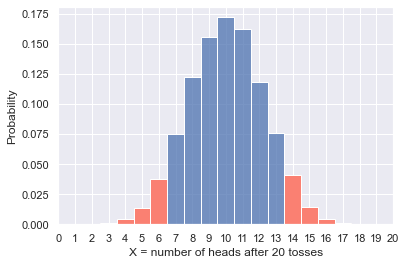


===Test result===
Cannot reject null hypothesis


In [195]:
n, p=20, .5
x=14
pv = symmetric_binom(n,p,x)

# hypothesis test result
alpha = 0.05
if pv < alpha:
    print('\n===Test result===\nReject null hypothesis')
else:
    print('\n===Test result===\nCannot reject null hypothesis')

Note that if we have observed one more head in the test result, i.e. $x=15$ instead, the p-value will be smaller than $0.05$. That means, we won't obtain a result at least as extreme as the observed $95\%$ of time given $H_0$ is true. Therefore, we can reject $H_0$ that assumes the coin is fair at $95\%$ confidence level.

Observed result: 15 heads out of 20 tosses
Probability of the observed result: 0.015
P-value, the probability of another result at least as extreme as the observed result: 0.041


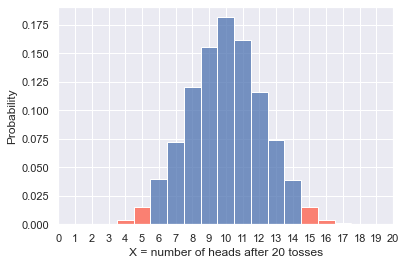


===Test result===
Reject null hypothesis


In [196]:
n, p=20, .5
x=15
pv = symmetric_binom(n,p,x)

# hypothesis test result
alpha = 0.05
if pv < alpha:
    print('\n===Test result===\nReject null hypothesis')
else:
    print('\n===Test result===\nCannot reject null hypothesis')

# P-value using Standard Score


## Unfair Coin Test

Let's say we believe the computerized coin toss is more favorable to heads with $p=0.7$. Our null hypothesis is:

$$H_0: p=0.7$$

And our alternative hypothesis is that "the probability of getting heads with the computerized coin toss is not the same as asummed":

$$H_a: p \neq 0.7$$

The unequal probabilities of heads and tails brings about two effects:
1. the binomial distribution of $x$ heads obtained from $n$ tosses will be **skewed** when $n$ is small; and
2. <u>"the probability of getting $x$ heads"</u> is not the same as <u>"the probability of getting $x$ tails"</u>, therefore, it's not the same as <u>"the probability of getting $n-x$ heads"</u> either. Therefore, we will approach the p-value calculation using a different approach than the one with the fair coin example.


### Skewed Binomial Distribution with small $n$

Let's see how the binomial distribution is skewed given the coin toss is as unfair as assumed:

observed result: 2 heads out of 4 tosses
probability of the observed result: 0.265


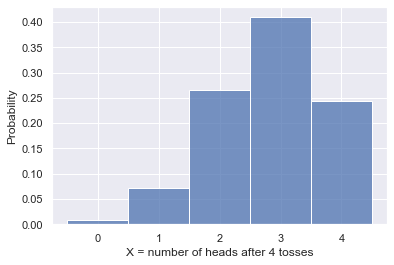

In [197]:
n, p=4, .7
x=2

# the probability of getting x heads
print(f'observed result: {x} heads out of {n} tosses')
print(f'probability of the observed result: {st.binom(n,p).pmf(x):.3f}')

# plot the histogram
rvs = st.binom(n,p).rvs(size=10000)
bars = sns.histplot(rvs,discrete=True, stat='probability').patches
plt.xticks(range(n+1), range(n+1))
plt.xlabel(f'X = number of heads after {n} tosses')
plt.show()

### Normal Approximation with Increased $n$

However, as we know, **binomial distribution** will approach **normal distribution** with increased value of $np$. 

Let's say the experiment is done with tossing the computerized coin for 40 times and we have obtained 18 heads from an experiment. Now we have the binomial distribution with $n=40, p=0.7$. 
- With bigger $np$, the binomial distributioin is approximately close to normal; and 
- We expect there will be $40\times 0.7=28$ heads out of 40 tosses, which is the mean of the distribution.

Note that the general guideline for a binomial distribution to be approximately normal is:

$$\boxed{np \geq 10\text{ and }n(1-p)\geq 10}$$

The reasons for such guideline is:
- Either the sample size $n$ should be large enough, or
- The probability of success or failure should not be too far away from $0.5$.

observed result: 18 heads out of 40 tosses
probability of the observed result: 0.001


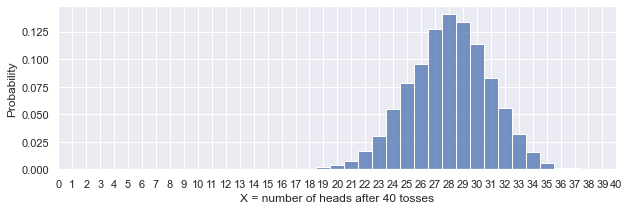

In [199]:
n, p=40, .7
x=18

# the probability of getting x heads
print(f'observed result: {x} heads out of {n} tosses')
print(f'probability of the observed result: {st.binom(n,p).pmf(x):.3f}')

# plot the histogram
rvs = st.binom(n,p).rvs(size=10000)
fig = plt.figure(figsize=(10, 3))
bars = sns.histplot(rvs,discrete=True, stat='probability').patches
plt.xticks(range(n+1), range(n+1))
plt.xlabel(f'X = number of heads after {n} tosses')
plt.show()

### Compute the P-value for Skewed Distribution

As mentioned earlier, given the probabilities of heads and tails are unequal, $P(X=x) \neq P(X = n-x)$. So we should use a different approach to compute the **p-value**.

If $np$ or $n(1-p)$ is too small and the distribution is skewed, we need to compute the probabilities of all the events involved one by one using the **binomial pmf** or **cdf** formulas to obtain the p-value.

For example, what is the p-value for the observed result being "getting 5 heads out of 10 tosses" given the probability of getting heads is $p=0.7$?

observed result: 5 heads out of 10 tosses
probability of the observed result: 0.1029

P(X<=5):0.150
P(X>=9),the cdf on other tail:0.149
p-value: 0.300


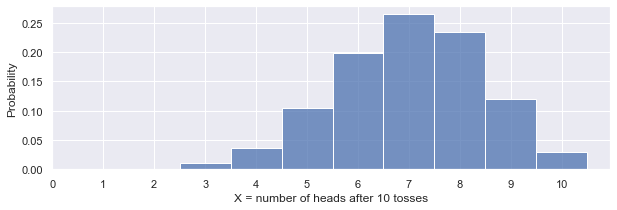

In [228]:
def compute_pv_skewed(n,p,x):    
    
    # the probability of getting x heads
    print(f'observed result: {x} heads out of {n} tosses')
    print(f'probability of the observed result: {st.binom(n,p).pmf(x):.4f}')
    
    # compute the cumulative probabilities for both tailes
    if x < n*p: 
        # compute P(X<=x)
        cdf_1 = st.binom(n,p).cdf(x)
        
        # compute the cdf of the value on the opposite tail
        for i in range(x, n+1):
            if 1-st.binom(n,p).cdf(i)<=cdf_1:
                cdf_2 = 1-st.binom(n,p).cdf(i)
                break
    else:
        # compute P(X>=x)
        cdf_1 = 1-st.binom(n,p).cdf(x)
        
        # compute the cdf of the value on the opposite tail
        for i in range(x):
            if st.binom(n,p).cdf(i)>=cdf_1:
                cdf_2 = st.binom(n,p).cdf(i)
                break
                
    # display the results
    if x < n*p:
        print(f'\nP(X<={x}):{cdf_1:.3f}')
        print(f'P(X>={i+1}),the cdf on other tail:{cdf_2:.3f}')
    else:
        print(f'P(X>={x}):{cdf_1:.3f}')
        print(f'P(X<={i-1}),the cdf on other tail:{cdf_2:.3f}')

    pv = cdf_1 + cdf_2
    print(f'p-value: {pv:.3f}')

    # plot the histogram
    sim_data = st.binom(n,p).rvs(size=10000)
    fig = plt.figure(figsize=(10, 3))
    bars = sns.histplot(sim_data,discrete=True, stat='probability').patches
    plt.xticks(range(n+1), range(n+1))
    plt.xlabel(f'X = number of heads after {n} tosses')
    plt.show()

# compute pv for the example
n, p, x=10, .7, 5
compute_pv_skewed(n,p,x)

Depending on the given distribution, the above mentioned approach could produce inaccurate p-value, for example, if our observed result is "4 heads out of 10 tosses". The cumulative probability for $x=4$ is $0.047$, however, there is no matching cumulative probability on the other tail, the closest one is $P(X\geq 10)$, which is $0.028$. The p-value obtained by combining these two values is too vague for any meaningful conclusion.

observed result: 4 heads out of 10 tosses
probability of the observed result: 0.0368

P(X<=4):0.047
P(X>=10),the cdf on other tail:0.028
p-value: 0.076


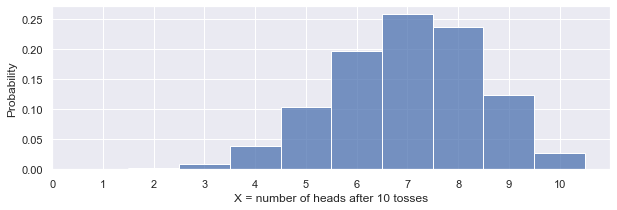

In [229]:
n,p,x = 10, .7, 4
compute_pv_skewed(n,p,x)

### Compute P-value with Normal Approximation

As mentioned earlier, <b>if both $np$ and $n(1-p)$ are large enough, then the distribution is close to normal</b>. 

If that's the case, we can deduce that the event that is equally likely as the observed result shall be at the same distrance from the mean($\mu$), therefore, this event is "getting $\mu+(\mu-x)$ heads out of $n$ tosses". 

For example, what is the p-value for "getting 18 heads out of 40 tosses" given the probability of getting heads is $p=0.7$. 

- Let $X$ be the sample sum, representing the number heads obtained after $n$ tosses;
- If $p=0.7$, the expected number of $X$ is $np=40\times0.7=28$;
- Given $X$ is approximately normal, the probability of getting 18 heads is almost the same as getting $28+(28-18)=38$ heads. Thus, we can obtain the p-value, which equals $P(X\leq 18) + P(X\geq 38)$ 


##### Using Standard Score

In statistics, we use the "number of the standard deviation of the distribution" to measure the distance of a data point ($x$) on a **normal distribution** from its mean $\mu$, which is called **z score**. It's derived by standardizing a data point ($x$) on the normal distribution using the formula:

$$\boxed{z = \frac{x-\mu}{\sigma}}$$

The z-score is therefore a value on **standard normal distribution**. With z-score, it's easy to look up the cumulative probability of $P(X\leq x)$ and $P(X\geq x)$ using the probability table, which, in this case, is the [z-table](https://www.ztable.net/).

Using our last example, we can convert the observed result, which is "getting $18$ heads out of 40 tosses given the probability of getting heads is 0.7", to a z-score with the **z-score formula**:
- We have know known that  $\mu = 40\times 0.7 = 28$ and $x=18$, 
- but, what is the $\sigma$?
    
##### The Standard Deviation of Sampling Distribution

As aforementioned, the probability distribution of test results (or, sample statistics), is referred to as **sampling distribution of sample statistics**, given the null hypothesis is true. Therefore, when we compute the z-score of an observed result (or, a sample statistic), we shall use the **standard deviation of the sampling distribution**, which is also called the **standard error**. 

In our example, our sample statistic of interest is sum. Therefore, what we have is the **sampling distribution of sample sums** under the null hypothesis:

$$\boxed{n\bar{X} \sim N(n \mu, \sqrt{n}\sigma) \text{ as }n\rightarrow \infty}$$

- where $\mu$ is the population mean, $\sigma$ is the population standard deviation and $n$ is the sample size.

However, what is the **population distribution**? 
- It is "2 only possible outcomes from a coin toss with the given probability of getting heads": $X\sim Bin(n=1, p=0.7)$
- the population mean is: $\mu = np = 1\times 0.7 = 0.7$
- the population standard deviation is: $\sigma = \sqrt{np(1-p)} = \sqrt{1\times0.7\times0.3}=\sqrt{0.21}\approx 0.458$

mean: 0.7, std: 0.458


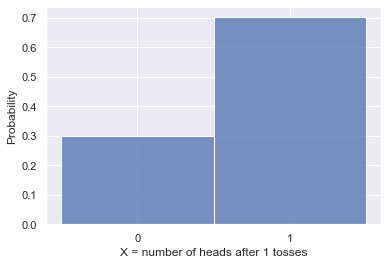

In [230]:
# Simulate the population distribution (n=1)
n, p = 1, 0.7
mu, std = st.binom(n,p).mean(), st.binom(n,p).std()
print(f'mean: {mu}, std: {std:.3f}')

# plot the histogram
rvs = st.binom(n,p).rvs(size=10000)
bars = sns.histplot(rvs,discrete=True, stat='probability').patches
plt.xticks(range(n+1), range(n+1))
plt.xlabel(f'X = number of heads after {n} tosses')
plt.show()

We can now compute the **mean and standard deviation of the sampling distribution of sums**, which is $n\bar{X} \sim N(n\mu, \sqrt{n}\sigma)$, as follows:

- the mean is: $n\mu = 40\times0.7 = 28$;
- the **standard error** (standard deviation of sample sum) is: $\sqrt{n}\sigma = \sqrt{40}\times0.458\approx 2.897$

And then, we can convert sample statistic to **z-score** and compute the p-value:
- the z-score: $\frac{x-n\mu}{\sqrt{n}\sigma} = \frac{18-28}{2.897} = -3.452$
- From [z-table](https://www.ztable.net/), the cumulative probability for $-3.452$ is approximately $0.00028$;
- And, we can easily compute the cumulative probability on the other tail using the z-score on the other tail: $3.452$, which is approximately $1-0.99972 \approx 0.00028$
- So the p-value for observing at least as extreme as the observed result is $0.00028 \times 2 = 0.00056$

The p-value is smaller than $0.05$, that is, the chance of getting 18 heads out of 40 coin tosses or more extreme is very rare, given the hypothesized probability of getting heads is true. Therefore, we are 95% confident to reject the null hypothesis.

In [243]:
# compute the above using Python
n, p = 40, .7
x = 18

# simulate the sampling distribution
binom = st.binom(n, p)
mu = binom.mean()
std = binom.std()

# convert to z-score
z = (x-mu)/std

# compute pv using z-score
cdf_x = st.norm().cdf(z) # z-score is a value on standard normal distribution
pv = 2*cdf_x

# display the results
print(f'The observed result is {x} heads out of {n} tosses; Given the probability of getting heads is {p}, we have:')
print(f'- z-score of the observed result: {z:.3f}')
print(f'- the p-value for at least as extreme as the observed result (two side):{pv:.5f}')

The observed result is 18 heads out of 40 tosses; Given the probability of getting heads is 0.7, we have:
- z-score of the observed result: -3.450
- the p-value for at least as extreme as the observed result (two side):0.00056


### How about One-tail Test

In the last example, what we do is a **two tailed test**, which p-value entails the probabilities from both sides (smaller or greather than the observed result) under the null hypothesis. 

How if our alternative hypothesis is "the computerized coin toss is not as favorable to heads as assumed" instead? 

- $H_a: p < 0.7$

This becomes a **one tailed test**:

- if "$<$" sign is involved, it's a **lower tailed test**; the **p-value** is the probability of observing a result that is smaller than the observed result: $P(X<x)$
- if "$>$" sign is involved, it's a **upper tailed test**; the **p-value** is the probability of observing a result that is greater than the observed result: $P(X>x)$

Again, if the **one tailed test** p-value is smaller than $\alpha$, we don't have sufficient evidence to support the alternative hypothesis. Vice versa.

Back to our example, wheres the alternative hypothesis is $H_a: p < 0.7$ and the observed test result is "18 heads after 40 tosses":
- this is a **lower tailed test**
- the p-value is $P(X\leq 18)$, which is $0.00028$
- since p-value is smaller than $0.05$, we don't have sufficient evidence to support the alternative hypothesis, which is $H_a: p < 0.7$. 

In [244]:
# compute the above using Python
n, p = 40, .5
x = 18

# simulate the sampling distribution
binom = st.binom(n, p)
mu = binom.mean()
std = binom.std()

# convert to z-score
z = (x-mu)/std

# compute pv using z-score
cdf_x = st.norm().cdf(z) # z-score is a value on standard normal distribution
pv = cdf_x

# display the results
print(f'The observed result is {x} heads out of {n} tosses; Given the probability of getting heads is {p}, we have:')
print(f'- z-score of the observed result: {z:.3f}')
print(f'- the p-value for at least as extreme as the observed result (one side):{pv:.5f}')

The observed result is 18 heads out of 40 tosses; Given the probability of getting heads is 0.5, we have:
- z-score of the observed result: -0.632
- the p-value for at least as extreme as the observed result (one side):0.26354


# Sample Proportion Test using P-value

Let's reuse the unfair coin test example where the hypothesized probability of getting heads is $p_0=0.7$. But this time the sample statistic of interest is not **sample sum**, but **sample proportion**, denoted as $\hat{p}$, which is just the proportion of $\frac{\text{number of heads obtained}}{\text{number of tosses}}$. 

For example, if we have obtained 55 heads after 100 tosses. We have obtained the **sample proportion** as $\hat{p} = \frac{55}{100}$. We will use $\hat{p}$ to test if we should reject or accept $p_0 = 0.7$ with $\alpha = 0.05$ as the significance level.

- First, it's important to note that the **sampling distribution of sample proportion** is also approximate to normal distribution: $\boxed{\hat{P}\sim N(np, \sqrt{\frac{p(1-p)}{n}})\text{ as }n\rightarrow \infty}$;

- We then compute the **standard error** of the sample proportion under the null hypothesis:

$$\sqrt{\frac{p_0(1-p_0)}{n}} = \sqrt{\frac{0.7*0.3}{100}}\approx 0.04583$$

- And now we can convert the observed sample proportion, $\hat{p}=\frac{55}{100}$, to z-score, or **z statistic**:

$$z = \frac{\hat{p}-p_0}{\text{SE}(\hat{p})} = \frac{0.55 - 0.7}{0.04583} \approx -3.273$$

- Finally, the p-value is $P(Z\leq z)\times 2$ for **two tailed test**, which equals $0.001$. It's smaller than the $\alpha$ we pick. That means, there is less than 5% of chance observing a result that is at least or more extreme given the null hypothesis is true. We are 95% confident that we have sufficient evidence to reject the null hypothesis, which is $p=0.7$. 

In [251]:
st.norm().cdf(-3.273) * 2

0.00106412477573408

# P-value with Continuous Data

### Height Example



# What $\alpha$ standard for

It's for **Type I Error** we'd achieve for long run. 

# Takeaways


1. When we compute p-value for discrete random variables, for example, count of successes after $n$ trials, we can use the following calculation if the probability distribution of the random variable is symmetrical: 

    - $\boxed{\text{p-value}= \begin{cases}
                 2\cdot P(X\leq x)\text{, if x}<np\\
                 2\cdot P(X\geq x)\text{, if x}>np\\
                 2\cdot P(X\geq x) - P(X=x)\text{, if x=np}
                 \end{cases}}$
                 
       where $np$ is the **mean** of the **binomial distribution**; and $np\geq 10\text{ and }n(1-p)\geq 10$
       
       
2. If the probability distribution. of the discrete random variable is a binomial distribution, and it's not symmetrical, we need to compute the probabilities of all events ....


3. When the discrete binomial distribution is approximately close to normal, we use z-score or z-statistic to compute the p-value, which is faster:

$$z = \frac{x-\mu}{\text{SE(sample statistic)}}$$

so the p-value is

 - $\boxed{\text{p-value}= \begin{cases}
                 2\cdot P(Z\leq z)\text{, if z<0}\\
                 2\cdot P(X\geq z)\text{, if z}>0
                 \end{cases}}$